# Python Notebook 10: Trees, Random Forests

Course on Statistical Machine Learning\
University of Oxford\
Author: F. Caron

In [1]:
# Default scientific libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
# Dataset
from sklearn.datasets import load_boston
# Decision tree and random forest functions
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
# Metric
from sklearn.metrics import mean_squared_error as mse


# Default plotting parameters
font = {'size'   : 18}
plt.rc('font', **font)
plt.rcParams['figure.dpi'] = 100
# For saving the figures
svfigs = False # True if you want to save figures
svdir = './figures/' # directory to save the figures
if svfigs: # set a higher resolution if saving the figures
    plt.rcParams['figure.dpi'] = 150
    plt.rcParams['savefig.bbox'] = 'tight'
else:
    plt.rcParams['figure.dpi'] = 75   

### Load Boston Housing data

In [2]:
# Load Boston housing data
X, y = load_boston(return_X_y=True)
variable_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X[:,0] = np.log(X[:,0]) # log crime rate

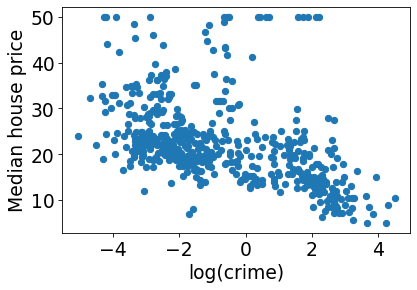

In [3]:
#X = np.log(X[:,0]).reshape(-1,1) # just crime
plt.figure()
plt.scatter(X[:,0], y)
plt.xlabel('log(crime)')
plt.ylabel('Median house price');

# Regression Trees

### Regression tree using one variable (crime rate)

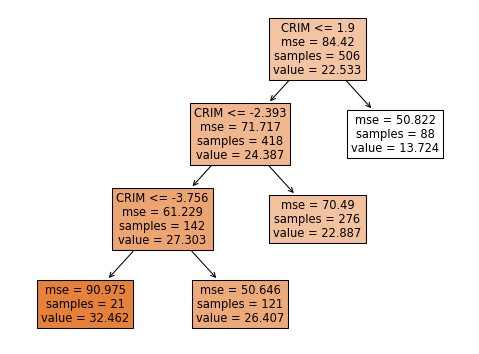

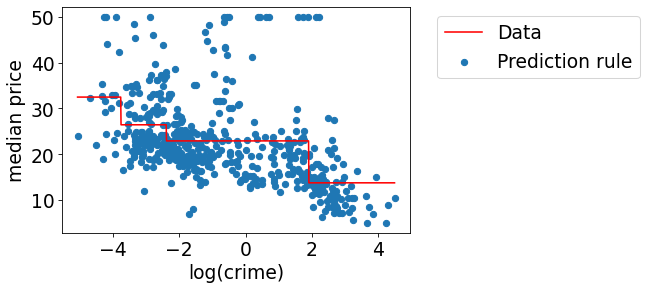

In [4]:
# Fit the regression tree
regr = DecisionTreeRegressor(max_leaf_nodes = 4)
regr.fit(X[:,0].reshape(-1,1),y)

# Plot the tree
plt.figure(figsize=(8, 6))
plot_tree(regr, feature_names=variable_names, filled=True, fontsize=11);

# Plot the prediction rule
x0 = np.arange(X[:,0].min(), X[:,0].max(), 0.01).reshape(-1,1)
yhat = regr.predict(x0)
plt.figure()
plt.scatter(X[:,0], y)
plt.xlabel('log(crime)')
plt.ylabel('median price')
plt.plot(x0, yhat, 'r');
plt.legend(['Data', 'Prediction rule'], bbox_to_anchor=(1.05, 1));

### Regression tree on the whole dataset

In [5]:
regr = DecisionTreeRegressor(max_leaf_nodes = 9)
regr.fit(X,y);

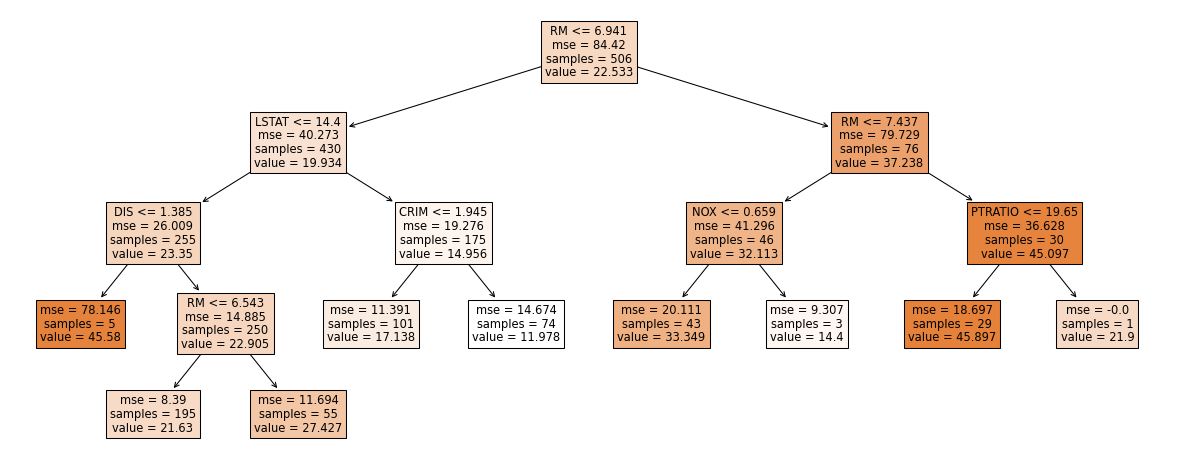

In [6]:
plt.figure(figsize=(20, 8))
plot_tree(regr, feature_names=variable_names, filled=True, fontsize=11);

# Random Forests

### Random Forest of trees of depth=1

Out-of-bag risk = 37.87422139364429


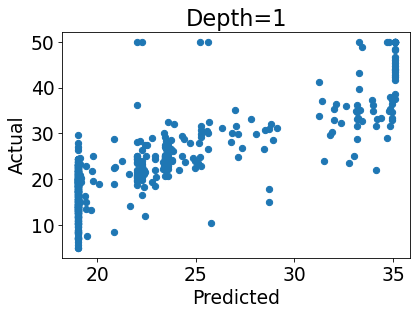

In [7]:
B = 500 # number of trees
# Random forest of trees with depth=1
regr_RF = RandomForestRegressor(n_estimators = B, oob_score = True, max_depth = 1)
regr_RF.fit(X,y)

print('Out-of-bag risk =', mse(y,regr_RF.oob_prediction_))

plt.figure()
plt.scatter(regr_RF.predict(X),y)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Depth=1');

### Random Forest of trees of depth=10

Out-of-bag risk = 10.314716959030779


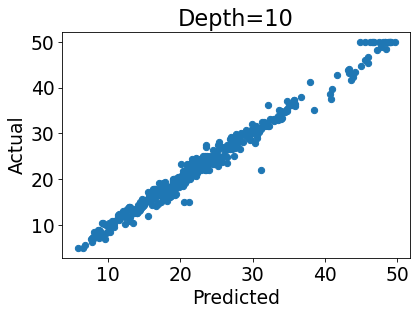

In [8]:
B = 500 # number of trees
# Random forest of trees with depth=10
regr_RF = RandomForestRegressor(n_estimators = B, oob_score = True, max_depth = 10)
regr_RF.fit(X,y)

print('Out-of-bag risk =', mse(y,regr_RF.oob_prediction_))

plt.figure()
plt.scatter(regr_RF.predict(X),y)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Depth=10');

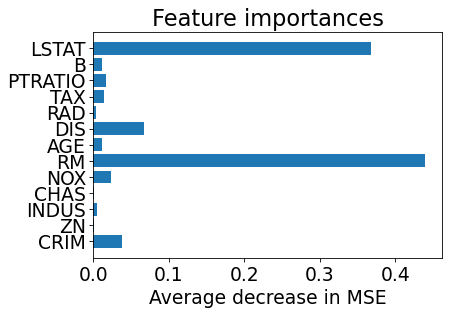

In [9]:
# Plot the feature importances
importances = regr_RF.feature_importances_
plt.figure()
plt.title("Feature importances")
ax = plt.barh(variable_names,importances,align="center");
plt.xlabel('Average decrease in MSE');

### Out-of-bag risk for different tree depths

In [10]:
depth_all = np.arange(20)+1
R_oob = np.zeros(shape=(depth_all.shape[0]))
for (i, depth) in enumerate(depth_all):
    print('Depth=', depth)
    regr_RF = RandomForestRegressor(n_estimators = B, oob_score = True, max_depth = depth)
    regr_RF.fit(X,y)
    R_oob[i] = mse(y,regr_RF.oob_prediction_)    

Depth= 1
Depth= 2
Depth= 3
Depth= 4
Depth= 5
Depth= 6
Depth= 7
Depth= 8
Depth= 9
Depth= 10
Depth= 11
Depth= 12
Depth= 13
Depth= 14
Depth= 15
Depth= 16
Depth= 17
Depth= 18
Depth= 19
Depth= 20


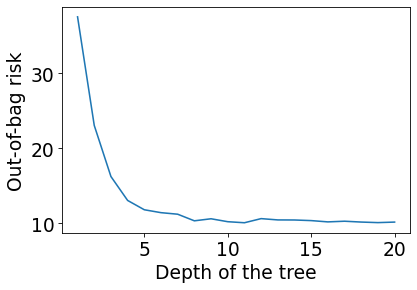

In [11]:
plt.figure()
plt.plot(depth_all, R_oob)
plt.ylabel('Out-of-bag risk')
plt.xlabel('Depth of the tree');